In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#fixing the size of graph size 
plt.rcParams['figure.figsize'] = (10.0 , 8.0)
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend:
%matplotlib inline


from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

sys.path.append("C:\\personal\\final\MACHINE_LEARNING_GITHUB\\MACHINE_LEARNING\\Housing_price_data\\seaborn-master\\seaborn-master\\")
import seaborn as sns
#from keras.wrappers.scikit_learn import KerasRegressor
#from keras.models import Sequential
#from keras.layers import Dense
#import xgboost as xgb
"""
seaborn: statistical data visualization.
Seaborn is a Python visualization library based on matplotlib.
It provides a high-level interface
for drawing attractive statistical graphics.

"""

'\nseaborn: statistical data visualization.\nSeaborn is a Python visualization library based on matplotlib.\nIt provides a high-level interface\nfor drawing attractive statistical graphics.\n\n'

In [149]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

In [151]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 1460 rows and 81 columns
----------------------------
The test data has 1459 rows and 80 columns


In [152]:
#train.info()

# let check missing data

In [153]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

# let check percentage of missing value

In [154]:
"""

#missing value counts in each of these columns
miss_sum = train.isnull().sum()
miss_percen = miss_sum / len(train)
#print(miss_percen)
miss_list = miss_percen[ miss_percen > 0] #pushing in list when percentage is greate than 0
#print(miss)
miss_list.sort_values( inplace = True )
print(miss_list)


"""

#missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)  
print(type(miss))
miss





<class 'pandas.core.series.Series'>


Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

# Let's look at a pretty picture explaining these missing values using a bar plot.

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Index(['count'], dtype='object')
['Name']


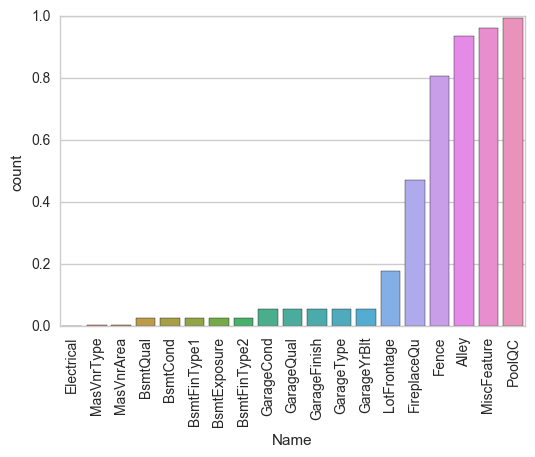

In [155]:
#visualising missing value
print(type(miss))
#miss = pd.to_frame(miss   #generally used for changing series to dataframe
miss1 = pd.DataFrame(miss)
print(type(miss1))

#very interesting to see miss value after execution and without execution

miss1.columns = ['count']
print(miss1.columns)
miss1.index.names = ['Name']
print(miss1.index.names)
miss1['Name'] = miss1.index



#plot the missing value count
sns.set(style="whitegrid" , color_codes = True)
plt.xticks(rotation=90)
sns.barplot( x = "Name", y = 'count' ,data = miss1)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


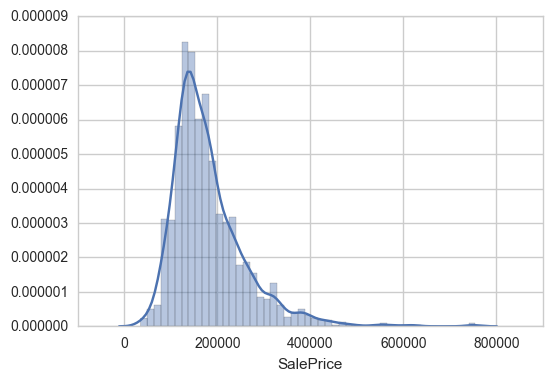

In [156]:
#SalePrice
sns.distplot(train['SalePrice'])

# Fixing the right skewness

In [157]:
#print current graph skewness
print("The Skewness of SalePrice is {}".format(train['SalePrice'].skew()))

The Skewness of SalePrice is 1.8828757597682129


The skewness of Saleprice now is 0.12133506220520406


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


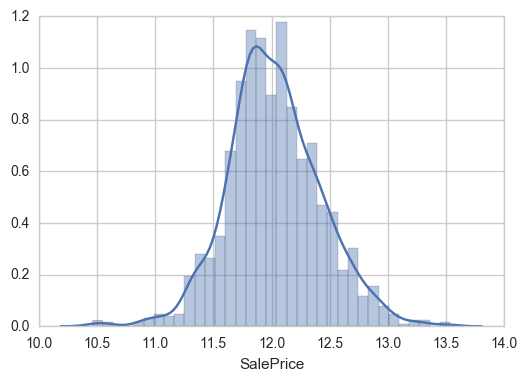

In [158]:
#now transforming the target variable
target = np.log(train['SalePrice'])
print("The skewness of Saleprice now is {}".format(target.skew()))
sns.distplot(target)


# #separate variables into new data frames in numerical and categorical data

In [159]:
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print("There are {} numeric and {} categorical columns in train in train".format(numeric_data.shape[0],cat_data.shape[0]))
print("There are {} numeric and {} categorical columns in train in train".format(numeric_data.shape[1],cat_data.shape[1]))

There are 1460 numeric and 1460 categorical columns in train in train
There are 38 numeric and 43 categorical columns in train in train


# Removing the id from the Datafrome

In [160]:
del numeric_data['Id']

# Correlation plot
 #we can later remove these correlated variables as they won't provide any useful information to the model.

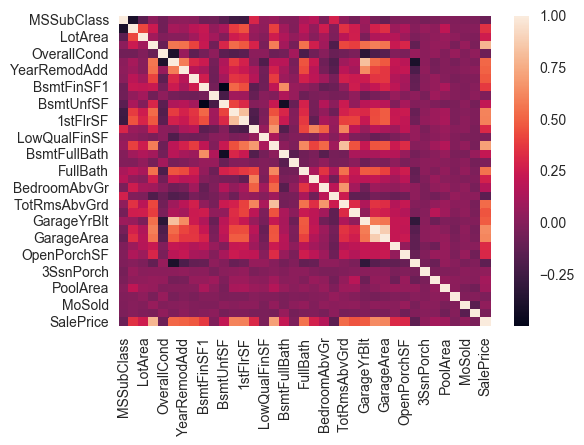

In [161]:
corr = numeric_data.corr()
sns.heatmap(corr)

#We can see the correlation of all variables against SalePrice.
#some variables seem to be strongly correlated with the target variable.
#A numeric correlation score will help us understand the graph better.

In [162]:
#print(corr['SalePrice'].sort_values(ascending = False)[:],'\n')
print(corr['SalePrice'].sort_values(ascending = False)[:15],'\n')  # first top 15 values

print( corr['SalePrice'].sort_values(ascending= True )[:5],'\n')



SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Name: SalePrice, dtype: float64 



#we see that the OverallQual feature is 79% correlated with the target variable. Overallqual feature refers to the overall material and quality of the materials of the completed house. Well, this make sense as well. People usually consider these parameters for their dream house. In addition, GrLivArea is 70% correlated with the target variable. GrLivArea refers to the living area (in sq ft.) above ground. The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area

# Let's check the OverallQual variable in detail.


In [163]:
train['OverallQual'].unique()



array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

#we can fairly treat it as an ordinal variable. An ordinal variable has an inherent order
#Let's check the median sale price of houses with respect to OverallQual.

#You might be wondering, “Why median ?” We are using median because the target variable is skewed. A skewed variable has outliers and median is robust to outliers.

In [164]:
#let's check the mean price per quality and plot it.
print(type(train))
#pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
#above line does not work 

pivot = pd.pivot_table(train,index="OverallQual",values = "SalePrice",aggfunc=np.median)
pivot.sort

<class 'pandas.core.frame.DataFrame'>


<bound method Series.sort of OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64>

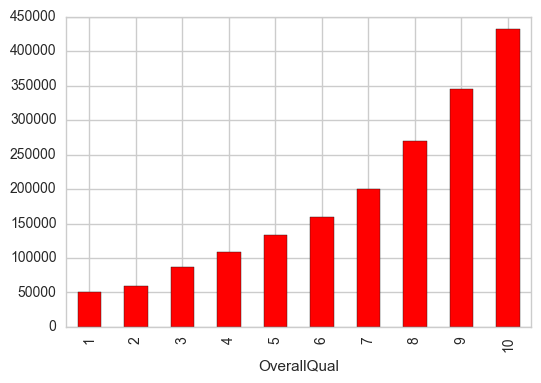

In [165]:
pivot.plot(kind='bar',color='red')

As the overall quality of a house increases, its sale price also increases.

# Let's visualize the next correlated variable GrLivArea and understand their behavior.

# learn this jointplot()

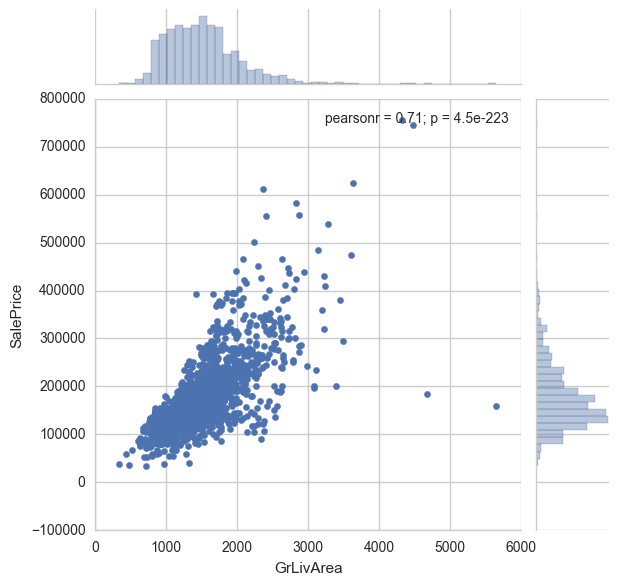

In [166]:

sns.jointplot(x=train['GrLivArea'] , y = train['SalePrice'])

 As seen above, here also we see a direct correlation of living area with sale price. 
 
 
However, we can spot an outlier value GrLivArea > 5000. I've seen outliers play a significant role in spoiling a model's performance.Hence, we'll get rid of it.

If you are enjoying this activity, you can visualize other correlated variables as well.






# Now, we'll move forward and explore categorical features. The simplest way to understand categorical variables is using .describe() command.

In [167]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [168]:
sp_pivot = train.pivot_table(index = 'SaleCondition' , values = 'SalePrice' , aggfunc = np.median )

sp_pivot

SaleCondition
Abnorml    130000
AdjLand    104000
Alloca     148145
Family     140500
Normal     160000
Partial    244600
Name: SalePrice, dtype: int64

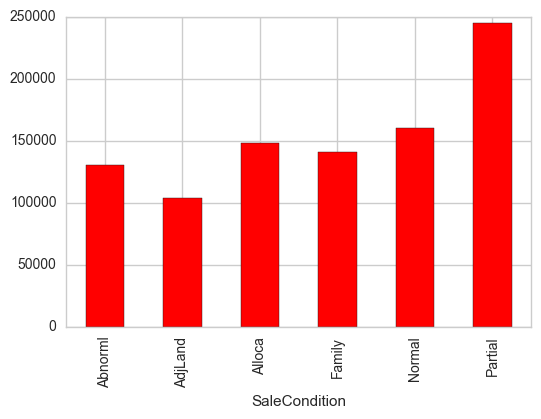

In [169]:
sp_pivot.plot(kind = 'bar' , color = 'red')

Moving forward, like we used correlation to determine the influence of numeric features on SalePrice. Similarly, we'll use the ANOVA test to understand the correlation between categorical variables and SalePrice

# ANOVA test is a statistical technique used to determine if there exists a significant difference in the mean of groups. For example, let's say we have two variables A and B. Each of these variables has 3 levels (a1,a2,a3 and b1,b2,b3). If the mean of these levels with respect to the target variable is the same, the ANOVA test will capture this behavior and we can safely remove them.

# Ho - There exists no significant difference between the groups. Ha - There exists a significant difference between the groups.



# Now, we'll define a function which calculates p values. From those p values, we'll calculate a disparity score. Higher the disparity score, better the feature in predicting sale price.

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<module 'matplotlib.pyplot' from 'C:\\Program Files\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

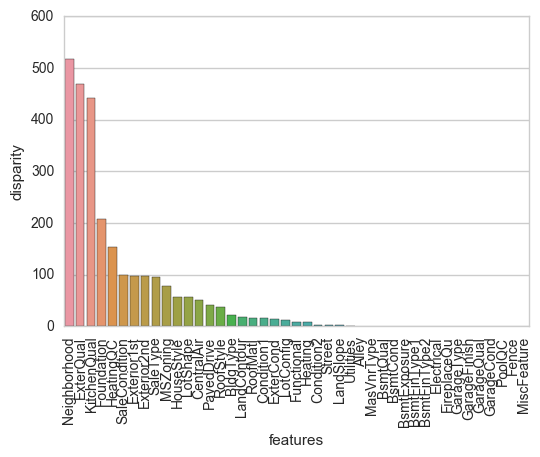

In [170]:
cat = [ f for f in train.columns if train.dtypes[f]=='object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        
        #stats.f_oneway is 1-way anova test
        
        #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
        """
        scipy.stats.f_oneway(*args)[source]
        Performs a 1-way ANOVA.

        The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

        Parameters:	
        sample1, sample2, ... : array_like
        The sample measurements for each group.
        Returns:	
        statistic : float
        The computed F-value of the test.
        pvalue : float
        The associated p-value from the F-distribution.

    
        """
        pvals.append(pval)
    anv['pval'] =  pvals
    return anv.sort_values('pval')



cat_data['SalePrice']  = train.SalePrice.values
k = anova(cat_data)
k['disparity'] = np.log(1. / k['pval'].values)
sns.barplot( data = k , x = 'features' , y= 'disparity')
plt.xticks(rotation=90)
plt
        

Finally, to get a quick glimpse of all variables in a data set, let's plot histograms for all numeric variables to determine if all variables are skewed. For categorical variables, we'll create a boxplot and understand their nature.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


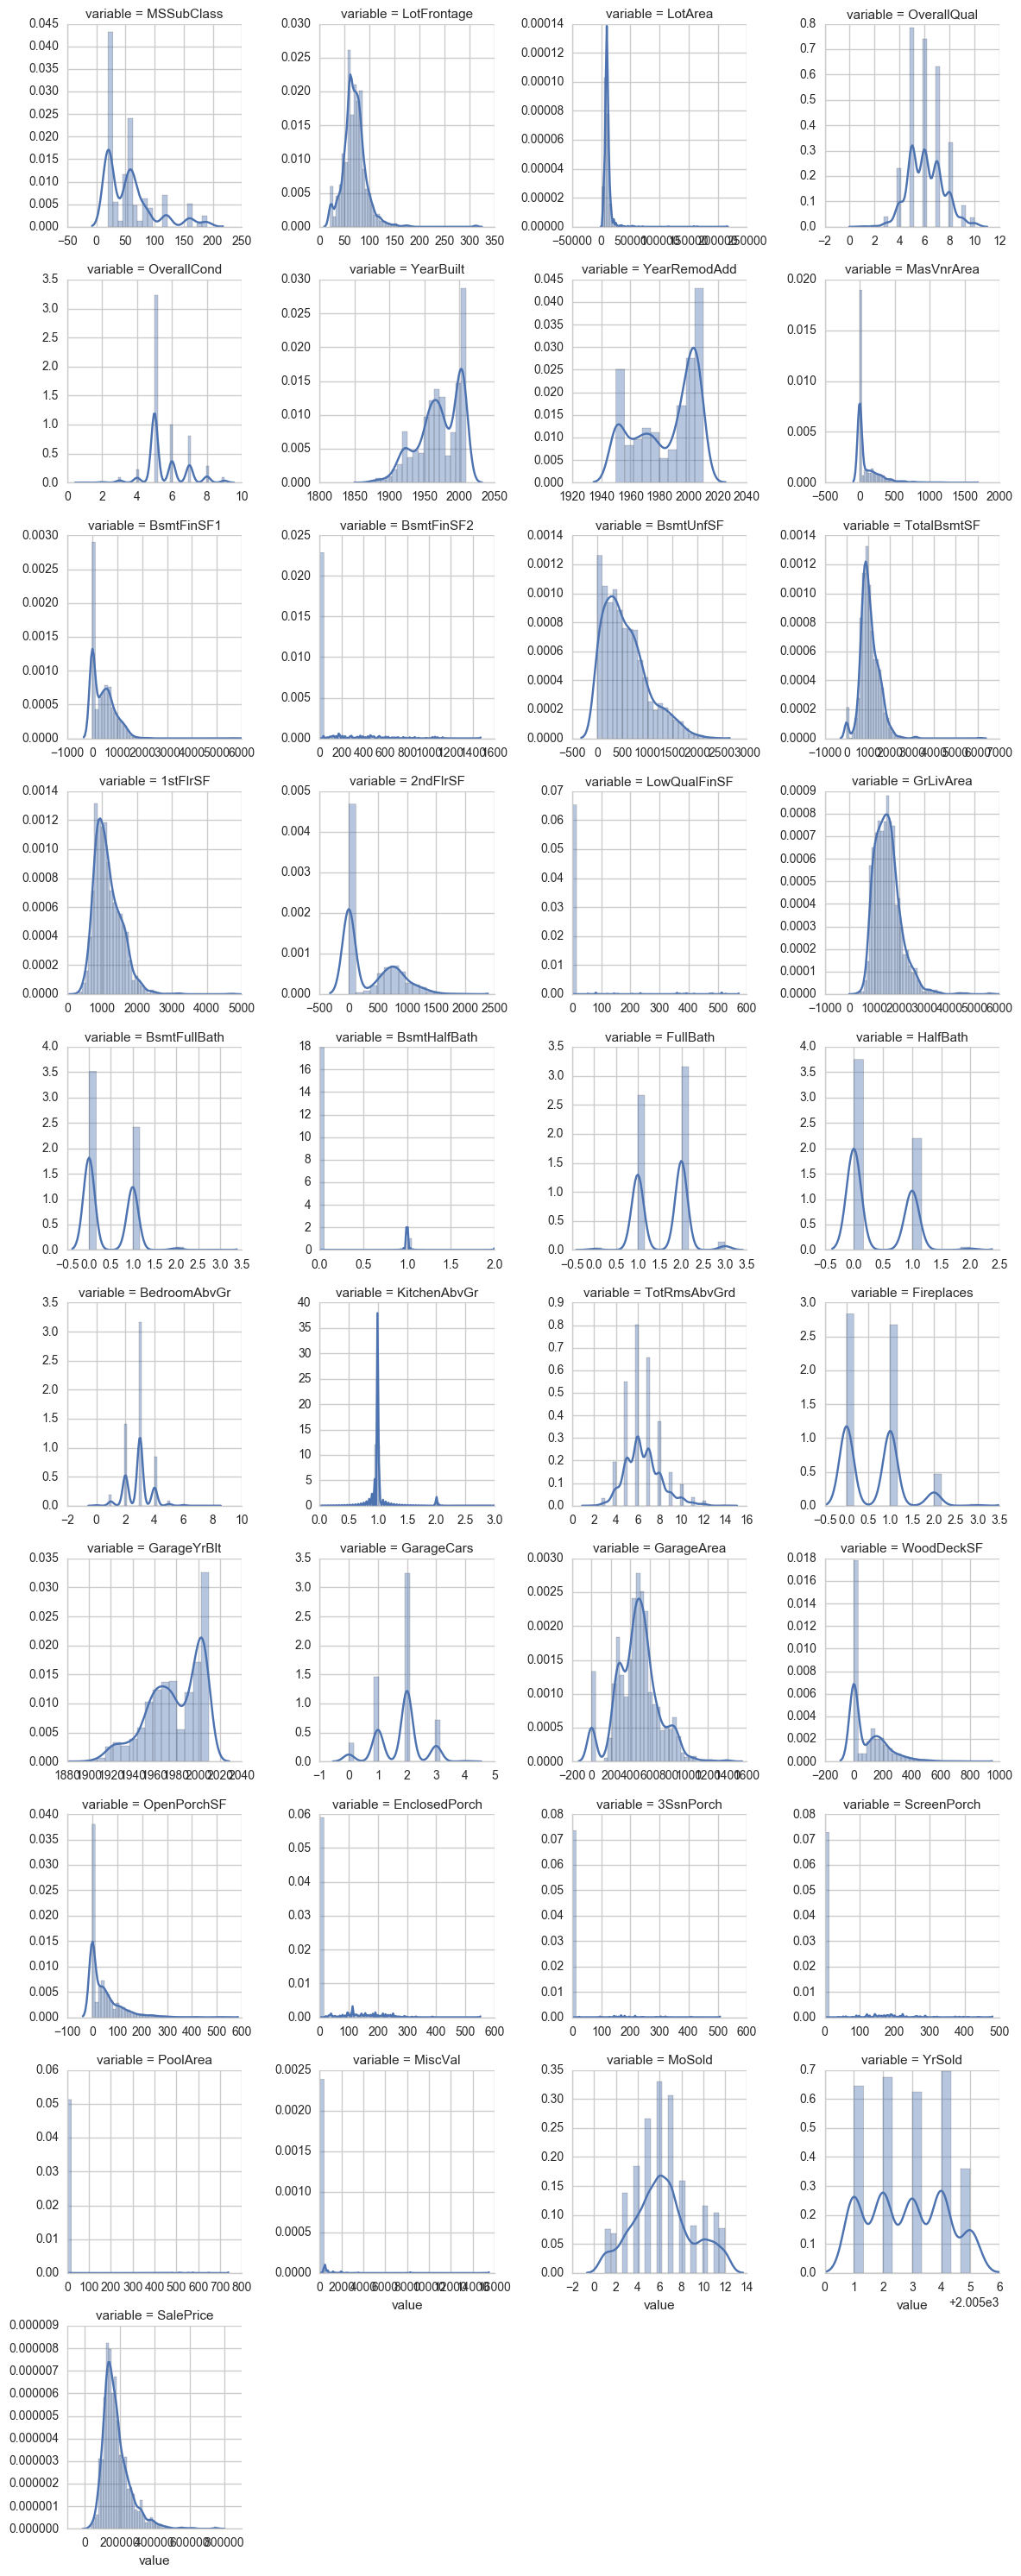

In [171]:
num = [ f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')

nd = pd.melt(train , value_vars = num)
n1 = sns.FacetGrid ( nd , col = 'variable' ,col_wrap=4 , sharex =False,sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1


most of the variables are right skewed. We'll have to transform them in the next stage. Now, let's create boxplots for visualizing categorical variables.

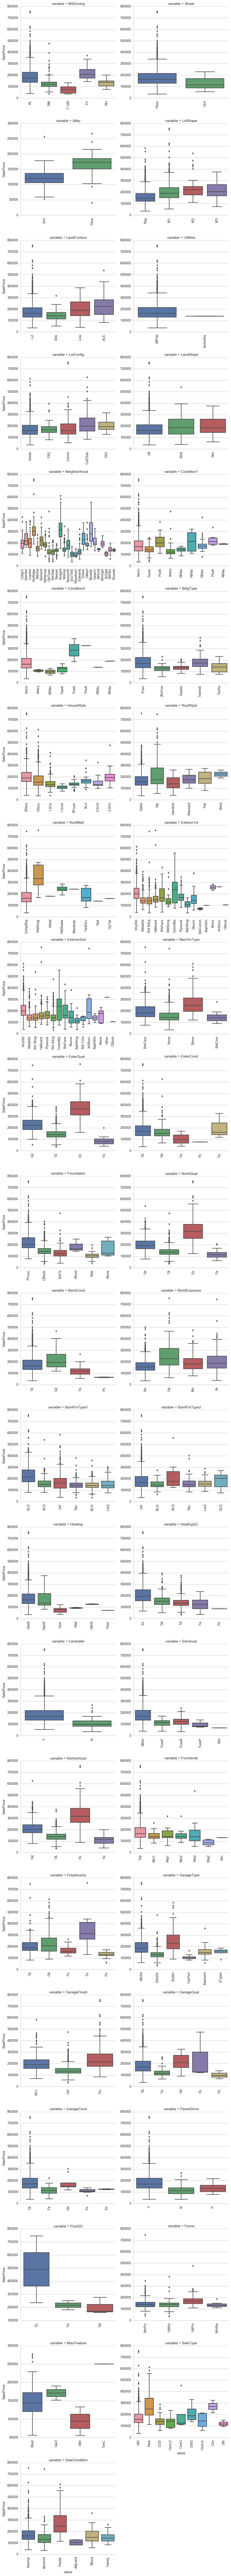

In [172]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x = plt.xticks(rotation=90)
    
    
cat = [f for f in train.columns if train.dtypes[f] == 'object']
p = pd.melt(train, id_vars = 'SalePrice' , value_vars=cat)
g = sns.FacetGrid(p, col='variable' , col_wrap=2 , sharex = False, sharey= False, size= 5)
g = g.map(boxplot, 'value' , 'SalePrice')

we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them.

# # As we know, tree-based algorithms are usually robust to outliers.


# 5. Data Pre-Processing
In this stage, we'll deal with outlier values, encode variables, impute missing values, and take every possible initiative which can remove inconsistencies from the data set.

If you remember, we discovered that the variable GrLivArea has outlier values. Precisely, one point crossed the 4000 mark. Let's remove that:

In [173]:
train.drop(train[train['GrLivArea'] > 4000 ].index , inplace=True)
train.shape

(1456, 81)

In [174]:
#imputing using mode
test.loc[666, 'GarageQual'] = "TA" #stats.mode(test['GarageQual']).mode
test.loc[666, 'GarageCond'] = "TA" #stats.mode(test['GarageCond']).mode
test.loc[666, 'GarageFinish'] = "Unf" #stats.mode(test['GarageFinish']).mode
test.loc[666, 'GarageYrBlt'] = "1980" #np.nanmedian(test['GarageYrBlt'])` 


In [175]:
#mark as missing
test.loc[1116, 'GarageType'] = np.nan

# Now, we'll encode all the categorical variables. This is necessary because most ML algorithms do not accept categorical values, instead they are expected to be converted to numerical. 

In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
    if fill_na is not None:
        data[var].fillna(fill_na, inplace=True)   #used to fill empty value
    le.fit(data[var])       #https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
    data[var] = le.transform(data[var])
    return data





In [177]:
#combine the data set
alldata = train.append(test)
alldata.shape

(2915, 81)

In [178]:
#impute lotfrontage by median of neighborhood

lot_frontage_by_neighborhood = train['LotFrontage'].groupby(train['Neighborhood'])
for key, group in lot_frontage_by_neighborhood:
    idx = (alldata['Neighborhood'] == key ) & (alldata['LotFrontage'].isnull())
    alldata.loc[idx, 'LotFrontage'] = group.median()
    



#Next, in other numeric variables, we'll impute the missing values by zero.
#imputing missing values

In [179]:
#imputing missing values
alldata["MasVnrArea"].fillna(0, inplace=True)
alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)
alldata["GarageArea"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)

# Variable names which have 'quality' or 'qual' in their names can be treated as ordinal variables, as mentioned above. Now, we'll convert the categorical variables into ordinal variables. To do this, we'll simply create a dictionary of key-value pairs and map it to the variable in the data set.

In [180]:
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     alldata[i] = alldata[i].map(qual_dict).astype(int)

alldata["BsmtExposure"] = alldata["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata["BsmtFinType1"] = alldata["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
alldata["BsmtFinType2"] = alldata["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
alldata["Functional"] = alldata["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
alldata["Fence"] = alldata["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

#encoding data
alldata["CentralAir"] = (alldata["CentralAir"] == "Y") * 1.0
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

for x in varst:
         factorize(alldata, x)

#encode variables and impute missing values
alldata = factorize(alldata, "MSZoning", "RL")
alldata = factorize(alldata, "Exterior1st", "Other")
alldata = factorize(alldata, "Exterior2nd", "Other")
alldata = factorize(alldata, "MasVnrType", "None")
alldata = factorize(alldata, "SaleType", "Oth")

# 6. Feature Engineering

 It's majorly a manual task but believe me, it's fun. Feature engineering requires domain knowledge and lots of creative ideas. The ideas for new features usually develop during the data exploration and hypothesis generation stages. The motive of feature engineering is to create new features which can help make predictions better.

Most categorical variables have near-zero variance distribution. Near-zero variance distribution is when one of the categories in a variable has >90% of the values. We'll create some binary variables depicting the presence or absence of a category. The new features will contain 0 or 1 values. In addition, we'll create some more variables which are self-explanatory with comments.

In [181]:
#creating (new variable ( 1 or 0 ) bassed on irregular count levels 
#The level with highest count is kept as 1 and rest as 0

alldata['IsRegularLotShape'] = (alldata['LotShape']=="Reg") * 1

alldata["IsLandLevel"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsElectricalSBrkr"] = (alldata["Electrical"] == "SBrkr") * 1
alldata["IsGarageDetached"] = (alldata["GarageType"] == "Detchd") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1
alldata["Remodeled"] = (alldata["YearRemodAdd"] != alldata["YearBuilt"]) * 1


#Did the modeling happen during the sale year ?

alldata['RecentRemodel'] = (alldata['YearRemodAdd'] == alldata["YrSold"]) * 1


# Was this house sold in the year it was built?
alldata["VeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1
alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1


#setting levels with high count as 1 and the rest as 0
#you can check for them using the value_counts function
alldata["HighSeason"] = alldata["MoSold"].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
alldata["NewerDwelling"] = alldata["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})






In [182]:
alldata.shape

(2915, 100)

In [183]:
#create alldata2
alldata2 = train.append(test)



alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})




# house completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})




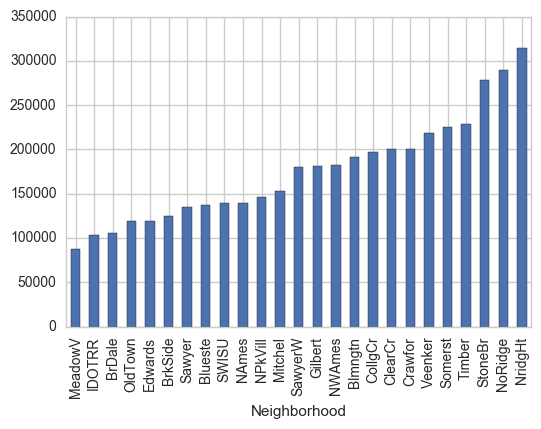

In [184]:
#calculating total area using all area columns
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

alldata["TotalArea"] = alldata[area_cols].sum(axis=1)

alldata['TotalArea1st2nd'] = alldata['1stFlrSF'] + alldata['2ndFlrSF']
alldata["Age"] = 2010 - alldata["YearBuilt"]
alldata["TimeSinceSold"] = 2010 - alldata["YrSold"]
alldata["SeasonSold"] = alldata["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]








# Simplifications of existing features into bad/average/good based on counts
alldata["SimplOverallQual"] = alldata.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplOverallCond"] = alldata.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplPoolQC"] = alldata.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
alldata["SimplGarageCond"] = alldata.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplGarageQual"] = alldata.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFunctional"] = alldata.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
alldata["SimplKitchenQual"] = alldata.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplHeatingQC"] = alldata.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtFinType1"] = alldata.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtFinType2"] = alldata.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtCond"] = alldata.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtQual"] = alldata.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterCond"] = alldata.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterQual"] = alldata.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})





#grouping neighborhood variable based on this plot
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')



 The graph above gives us a good hint on how to combine levels of the neighborhood variable into fewer levels. We can combine bars of somewhat equal height in one category. To do this, we'll simply create a dictionary and map it with variable values.

In [185]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1,"Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3, "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}
alldata['NeighborhoodBin'] = alldata2['Neighborhood'].map(neighborhood_map)




alldata.loc[alldata2.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Timber', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Veenker', "Neighborhood_Good"] = 1
alldata["Neighborhood_Good"].fillna(0, inplace=True)


alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})



# House completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})
alldata.shape
(2915, 124)


(2915, 124)

In [186]:
train_new = alldata[alldata['SalePrice'].notnull()]
test_new = alldata[alldata['SalePrice'].isnull()]


print("Train shape is ".format({}),train_new.shape)
print("Test Shape is ".format({}),test_new.shape)

Train shape is  (1456, 126)
Test Shape is  (1459, 126)


# Now, we'll transform numeric features and remove their skewness.

In [187]:
#get numeric features

numeric_features = [ f for f in train_new.columns if train_new[f].dtype != object]


#transform the numeric features using log(x+1)

from scipy.stats import skew
skewed = train_new[numeric_features].apply(lambda x : skew(x.dropna().astype(float)))

skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])




C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


# Now, we'll standardize the numeric features.

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
scaler = StandardScaler()

"""
The idea behind StandardScaler is that it will transform your data such that
its distribution will have a mean value 0 and standard deviation of 1.




Standardize features by removing the mean and scaling to unit variance
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).



"""


scaler.fit(train_new[numeric_features])
scaled = scaler.transform(train_new[numeric_features])
for i , col in enumerate(numeric_features):
    train_new[col] = scaled[:,i]
    

numeric_features.remove('SalePrice')

scaled = scaler.fit_transform(test_new[numeric_features])

for i , col in enumerate(numeric_features):
    test_new[col] = scaled[:,i]





C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#  We'll one-hot encode the categorical variable. In one-hot encoding, every level of a categorical variable results in a new variable with binary values (0 or 1). We'll write a function to encode categorical variables:

"""
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f



"""

In [190]:
def onehot(onehot_df , df , column_name,fill_na):
    onehot_df[column_name] = df[column_name]
    if fill_na is not None:
        onehot_df[column_name].fillna(fill_na)
    
    dummies = pd.get_dummies(onehot_df[column_name],prefix="_"+column_name)
    
    onehot_df = onehot_df.join(dummies)
    onehot_df = onehot_df.drop([column_name],axis=1)
    
    return onehot_df



def munge_onehot(df):
    #print(df)
    onehot_df = pd.DataFrame(index = df.index)
    
    onehot_df = onehot(onehot_df, df, "MSSubClass", None)
    onehot_df = onehot(onehot_df, df, "MSZoning", "RL")
    onehot_df = onehot(onehot_df, df, "LotConfig", None)
    onehot_df = onehot(onehot_df, df, "Neighborhood", None)
    onehot_df = onehot(onehot_df, df, "Condition1", None)
    onehot_df = onehot(onehot_df, df, "BldgType", None)
    onehot_df = onehot(onehot_df, df, "HouseStyle", None)
    onehot_df = onehot(onehot_df, df, "RoofStyle", None)
    onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd")
    onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd")
    onehot_df = onehot(onehot_df, df, "Foundation", None)
    onehot_df = onehot(onehot_df, df, "SaleType", "WD")
    onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal")
    
    #Fill in missing MasVnrType for rows that do have a MasVnrArea.
    
    #print(df[["MasVnrType","MasVnrArea"]])
    temp_df = df[["MasVnrType","MasVnrArea"]].copy()
    
    
    idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"]=="None") | (df["MasVnrType"].isnull()))
    
    temp_df.loc[idx, "MasVnrType"] = "BrkFace"
    
    onehot_df = onehot(onehot_df , temp_df , "MasVnrType" , "None")
    onehot_df = onehot(onehot_df, df, "LotShape", None)
    onehot_df = onehot(onehot_df, df, "LandContour", None)
    onehot_df = onehot(onehot_df, df, "LandSlope", None)
    onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr")
    onehot_df = onehot(onehot_df, df, "GarageType", "None")
    onehot_df = onehot(onehot_df, df, "PavedDrive", None)
    onehot_df = onehot(onehot_df, df, "MiscFeature", "None")
    onehot_df = onehot(onehot_df, df, "Street", None)
    onehot_df = onehot(onehot_df, df, "Alley", "None")
    onehot_df = onehot(onehot_df, df, "Condition2", None)
    onehot_df = onehot(onehot_df, df, "RoofMatl", None)
    onehot_df = onehot(onehot_df, df, "Heating", None)
    
    
    
    # we'll have these as numerical variables too
    onehot_df = onehot(onehot_df, df, "ExterQual", "None")
    onehot_df = onehot(onehot_df, df, "ExterCond", "None")
    onehot_df = onehot(onehot_df, df, "BsmtQual", "None")
    onehot_df = onehot(onehot_df, df, "BsmtCond", "None")
    onehot_df = onehot(onehot_df, df, "HeatingQC", "None")
    onehot_df = onehot(onehot_df, df, "KitchenQual", "TA")
    onehot_df = onehot(onehot_df, df, "FireplaceQu", "None")
    onehot_df = onehot(onehot_df, df, "GarageQual", "None")
    onehot_df = onehot(onehot_df, df, "GarageCond", "None")
    onehot_df = onehot(onehot_df, df, "PoolQC", "None")
    onehot_df = onehot(onehot_df, df, "BsmtExposure", "None")
    onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None")
    onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None")
    onehot_df = onehot(onehot_df, df, "Functional", "Typ")
    onehot_df = onehot(onehot_df, df, "GarageFinish", "None")
    onehot_df = onehot(onehot_df, df, "Fence", "None")
    onehot_df = onehot(onehot_df, df, "MoSold", None)
    
    
    # Divide  the years between 1871 and 2010 into slices of 20 years
    
    
    year_map = pd.concat(pd.Series("YearBin" + str(i+1),index=range(1871 + i*20 , 1891 + i *20)) for i in range(0,7))
    
    yearbin_df = pd.DataFrame(index = df.index)
    
    yearbin_df["GarageYrBltBin"]  = df.GarageYrBlt.map(year_map)
    yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)
    yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
    
    yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)

    onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None)
    return onehot_df
    
    

    
    
#create one-hot features

onehot_df = munge_onehot(train)


neighborhood_train = pd.DataFrame(index=train_new.shape)
neighborhood_train['NeighborhoodBin'] = train_new['NeighborhoodBin']

neighborhood_test = pd.DataFrame(index = test_new.shape)
neighborhood_test['NeighborhoodBin'] = test_new['NeighborhoodBin']

onehot_df = onehot(onehot_df , neighborhood_train , 'NeighborhoodBin' , None)








    
    
    
    
    
    

In [191]:
#print(onehot_df)
#print(train_new.columns)
#print(onehot_df.columns)
train_new1 = train_new.merge(onehot_df)
train_new1.shape



MergeError: No common columns to perform merge on

In [35]:
Why do we use inplace=True in sort_value

SyntaxError: invalid syntax (<ipython-input-35-014883fbcf75>, line 1)